### K-means Clustering
* 개념 소개
    * 주어진 데이터 집합을 유사한 데이터들의 그룹으로 나누는 것을 군집화(clustering)라 하고 이렇게 나누어진 유사한 데이터의 그룹을 군집(cluster)이라 한다.
    * 군집화는 예측 문제와 달리 특정한 독립변수와 종속변수의 구분도 없고 학습을 위한 목표값도 필요로 하지 않는 비지도 학습의 일종이다.

* Cluster의 기준
    * Centroid model
        * 클러스터를 만들 때 기준을 기준 데이터를 사용하여 분포에 따라 cluster를 만든다.
        * 기준 데이터는 데이터셋에 포함될 필요가 없으며 대표적으로 중앙값,평균값을 사용한다.
        * 대표적으로 많이 사용되는 K-means Algorithm이 여기에 속하며, 평균값을 사용한다.

    * Hierarchical model (Connectivity model)
        * 서로 관련 있는 데이터들을 계층화를 하여 cluster를 정의한다.
        * 서로 관련된 데이터들을 묶어서 이들을 대표할 만한 상위 계층을 생성한다.

    * Density model
        * 데이터들이 특정 부분에 밀집되어 존재하고 있을 때 그 부분에 있는 데이터들을 묶어서 cluster를 생성한다.


### K-means Clustering
* k-means 라는 이름의 의미는 주어진 데이터를 k개로 clustering을 하겠다는 의미이며 k개의 평균값을 사용하여 k개의 cluster를 만든다는 것이다.
* 여기서 k개의 기준은 사용자가 직접 정해주어야 한다.

##### K-means Clustering 기준값 조정 규칙
* 기본적으로 k-means clustering은 두 가지 기준으로 기준 값을 조정한다.
    * (1) cluster 내의 기준과 데이터들의 거리합 최소
    * (2) 각각의 cluster 간 거리 최대

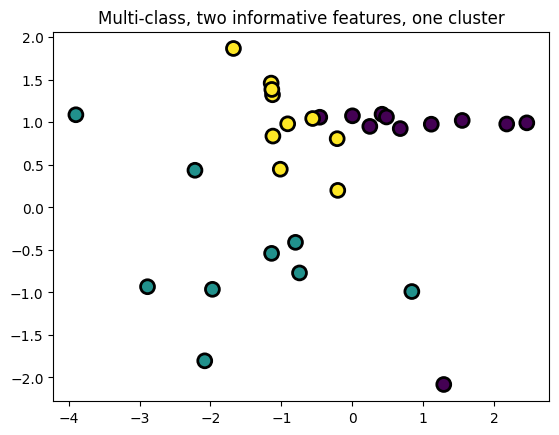

In [27]:
# make_classification - 설정에 따른 분류용 가상 데이터를 생성하는 명령
# n_samples: 표본 데이터의 수, 디폴트 100
# n_features: 독립 변수의 수, 디폴트 20
# n_informative: 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_classes: 종속 변수의 클래스 수, 디폴트 2
# weight: 각 클래스에 할당된 표본 수
# random_state : 난수 발생 시드
# 반환값:
# x : [n_samples, n_features] 크기의 배열. 독립변수
# y : [n_samples] 크기의 배열. 종속 변수

from random import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.title('Multi-class, two informative features, one cluster')
x, y = make_classification(n_samples=30, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           n_classes=3, random_state=123)
plt.scatter(x[:,0], x[:,1], marker='o', c=y, s=100, edgecolors='k', linewidths=2)
plt.show()

In [28]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='random')
model.fit(x)

KMeans(init='random', n_clusters=3)

In [29]:
#중심점의 좌표값
model.cluster_centers_

array([[ 1.57366878,  0.15013963],
       [-0.48250939,  1.03344118],
       [-1.96728067, -0.48772003]])

In [30]:
pred = model.predict(x)
pred

array([0, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 1])

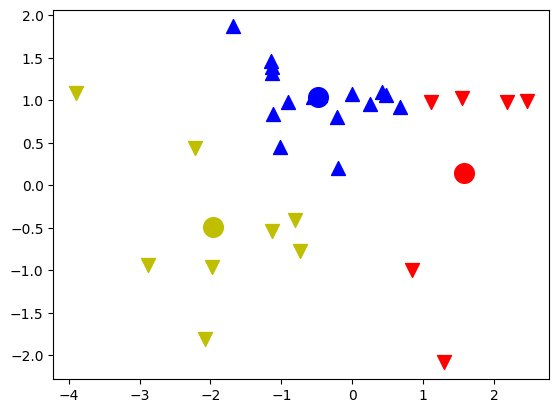

In [31]:
c0, c1, c2 = model.cluster_centers_
plt.scatter(x[model.labels_ == 0,0], x[model.labels_ == 0,1], s=100, marker='v', c='r')
plt.scatter(x[model.labels_ == 1,0], x[model.labels_ == 1,1], s=100, marker='^', c='b')
plt.scatter(x[model.labels_ == 2,0], x[model.labels_ == 2,1], s=100, marker='v', c='y')

plt.scatter(c0[0], c0[1], s=200, c='r')
plt.scatter(c1[0], c1[1], s=200, c='b')
plt.scatter(c2[0], c2[1], s=200, c='y')
plt.show()

In [32]:
# x 데이터와 중심점 사이의 거리를 측정한 값,
# 그리고 클러스터링을 통해 할당된 레이블을 하나의 데이터프레임으로 만들어 출력

import pandas as pd
import numpy as np

df = pd.DataFrame(np.hstack([x,
np.linalg.norm(x - c0, axis=1)[:, np.newaxis], # 첫번째 클러스터 중심값과의 거리
np.linalg.norm(x - c1, axis=1)[:, np.newaxis], # 두번째 클러스터 중심값과의 거리
np.linalg.norm(x - c2, axis=1)[:, np.newaxis], # 세번째 클러스터 중심값과의 거리
model.labels_[:, np.newaxis]]),
columns=["x0", "x1", "d0", "d1", "d2", "class"])
df

,x0,x1,d0,d1,d2,class
0,1.291320,-2.083269,2.251185,3.586133,3.628258,0.0
1,0.677549,0.926385,1.185574,1.164988,2.999136,1.0
2,0.248341,0.952078,1.549064,0.735365,2.642347,1.0
3,-2.218453,0.436127,3.802891,1.835833,0.957383,2.0
4,-3.898155,1.089007,5.551786,3.416097,2.492858,2.0
5,-2.080478,-1.805009,4.144321,3.257346,1.322144,2.0
6,1.115515,0.977966,0.946151,1.598987,3.413483,0.0
7,-0.203825,0.199599,1.778182,0.879180,1.892666,1.0
8,0.420718,1.095145,1.490748,0.905332,2.864960,1.0
9,-0.457603,1.059832,2.225670,0.036288,2.161954,1.0


In [34]:
# 모델과 데이터를 인수로 받아 산점도와 중심점을 출력할 함수
def plot_clusters(model, data):
    c0, c1, c2 = model.cluster_centers_
    plt.scatter(data[model.labels_ == 0, 0], x[model.labels_ == 0, 1], s=20, marker="v", c="r")
    plt.scatter(data[model.labels_ == 1, 0], x[model.labels_ == 1, 1], s=20, marker="^", c="b")
    plt.scatter(x[model.labels_ == 2, 0], x[model.labels_ == 2, 1], s=100,marker="v", c="y")
    plt.scatter(c0[0], c0[1], s=40, c="r")
    plt.scatter(c1[0], c1[1], s=40, c="b")
    plt.scatter(c2[0], c2[1], s=200, c="y")

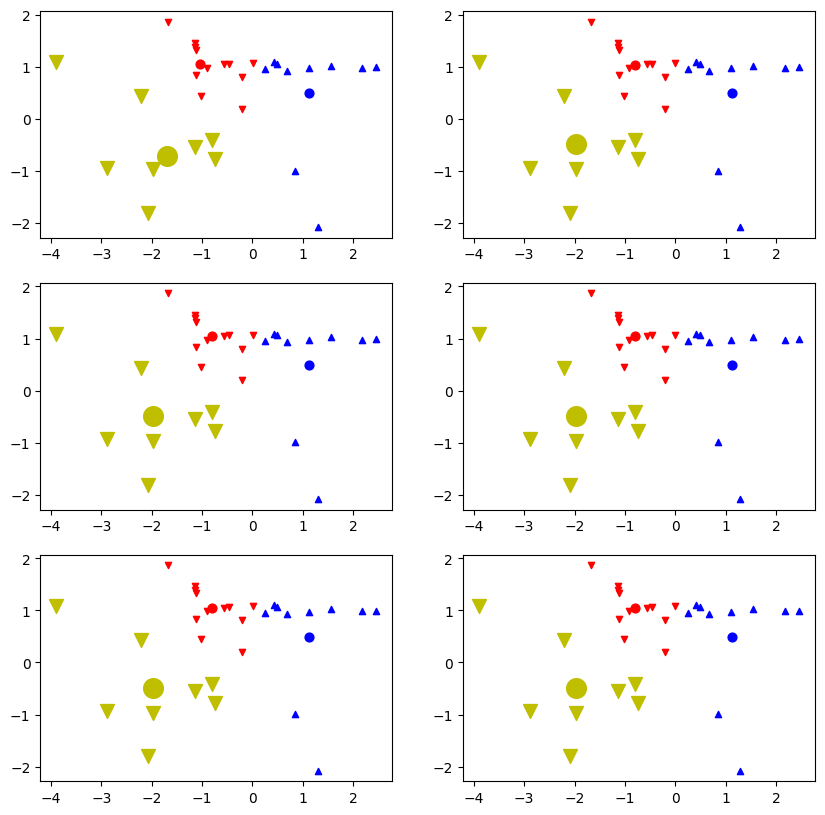

In [36]:
# KMeans 클래스의 max_iter 인자는 최대 학습 횟수를 지정
plt.figure(figsize=(10,10))
model1 = KMeans(n_clusters=3, init='random', n_init=1, max_iter=1, random_state=1)
model1.fit(x)
plt.subplot(3,2,1)
plot_clusters(model1, x)

model2 = KMeans(n_clusters=3, init='random', n_init=1, max_iter=2, random_state=1)
model2.fit(x)
plt.subplot(3,2,2)
plot_clusters(model2, x)

model3 = KMeans(n_clusters=3, init='random', n_init=1, max_iter=3, random_state=1)
model3.fit(x)
plt.subplot(3,2,3)
plot_clusters(model3, x)

model4 = KMeans(n_clusters=3, init='random', n_init=1, max_iter=4, random_state=1)
model4.fit(x)
plt.subplot(3,2,4)
plot_clusters(model4, x)

model5 = KMeans(n_clusters=3, init='random', n_init=1, max_iter=5, random_state=1)
model5.fit(x)
plt.subplot(3,2,5)
plot_clusters(model5, x)

model6 = KMeans(n_clusters=3, init='random', n_init=1, max_iter=6, random_state=1)
model6.fit(x)
plt.subplot(3,2,6)
plot_clusters(model6, x)
plt.show()

In [39]:
import numpy as np
x = np.random.randint(low=1, high=10, size=(3,3))
print(x)
print('---------------------------')
L1_norm = np.linalg.norm(x, axis=1, ord=1) # ord=1은 L1_norm
print(L1_norm)
print('shape: ', L1_norm.shape)
print('---------------------------')
L2_norm = np.linalg.norm(x, axis=1, ord=2) #ord=2는 L2_norm, default임
print(L2_norm)
print('shape: ', L2_norm.shape)

[[5 6 3]
 [4 5 6]
 [8 8 8]]
---------------------------
[14. 15. 24.]
shape:  (3,)
---------------------------
[ 8.36660027  8.77496439 13.85640646]
shape:  (3,)


#### iris data를 사용한 k-means clustering 만들기

In [40]:
import math
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_data_pd = pd.DataFrame(iris_data, columns=iris.feature_names)
iris_data_pd

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


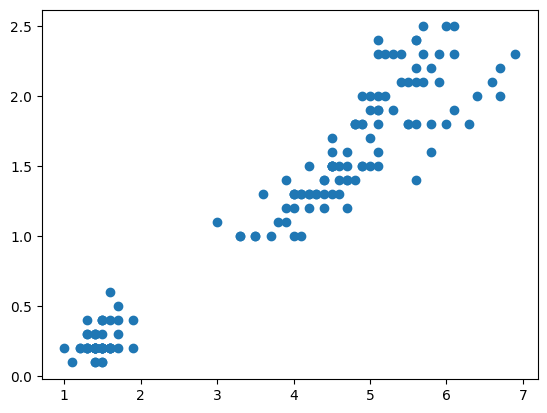

In [41]:
# petal length 와 petal width 데이터 2개의 상관 관계
import matplotlib.pyplot as plt
petals = pd.DataFrame(iris_data_pd.values[:,2:4], columns=['petal length(cm)', 'petal width(cm)'])
plt.scatter(petals.values[:,0], petals.values[:,1])
plt.show()

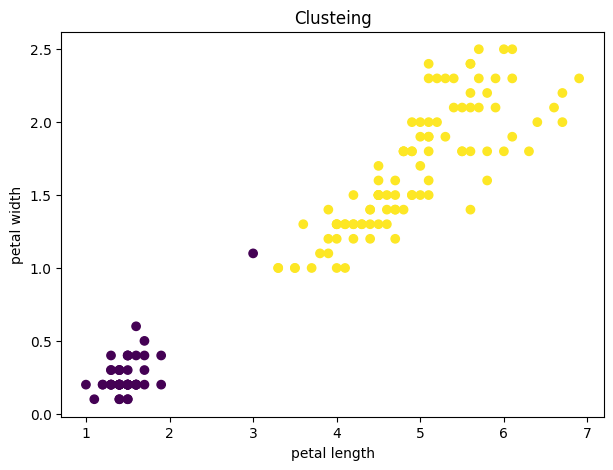

In [42]:
# k=2로 clusteting
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=20)
km.fit(iris_data_pd.iloc[:,2:4])
y_pred = km.predict(iris_data_pd.iloc[:,2:4])
plt.figure(figsize=(7,5))
plt.scatter(iris_data_pd.iloc[:,2], iris_data_pd.iloc[:,3], c=y_pred)
plt.title('Clusteing')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [43]:
km.predict(iris_data_pd.iloc[:,2:4])
print(iris_data_pd.iloc[98,2:4])

petal length (cm)    3.0
petal width (cm)     1.1
Name: 98, dtype: float64


In [44]:
#각 클러스터 기준값 확인
km.cluster_centers_

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [45]:
#유클리드 거리 측정
def distance(x1,y1,x2,y2):
    dx = x2 - x1
    dy = y2 - y1
    squared = dx**2 + dy**2
    result = math.sqrt(squared)
    return result

print('0 cluster distance :', distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,3],
                                       km.cluster_centers_[0][0], km.cluster_centers_[0][1]))
print('1 cluster distance :', distance(iris_data_pd.iloc[98,2], iris_data_pd.iloc[98,3],
                                       km.cluster_centers_[1][0], km.cluster_centers_[1][1]))

0 cluster distance : 1.7246990164733285
1 cluster distance : 2.0112458036464465


##### bmi.csv에서 상위 100개의 데이터를 가지고 클러스터를 만들어서 출력하기
* height,weight,cluser_id(plt의 c값) 출력
* k는 3

In [49]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('../../../AI머신러닝데이터/bmi.csv')
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [90]:
import numpy as np


x_data = df.iloc[:100,:-1]
km = KMeans(n_clusters=3, random_state=8080)
km.fit(x_data)
y_pred = km.predict(x_data)


y_pred_df = pd.DataFrame(y_pred, columns=['cluster_id'])
bmi_data = pd.concat([x_data, y_pred_df],axis=1)
bmi_data


# x_data['cluster_id'] = y_pred  #이렇게 해도됨
# x_data


,height,weight,cluster_id
0,142,62,1
1,142,73,1
2,177,61,2
3,187,48,2
4,153,60,1
...,...,...,...
95,136,51,1
96,131,37,0
97,180,75,2
98,191,60,2


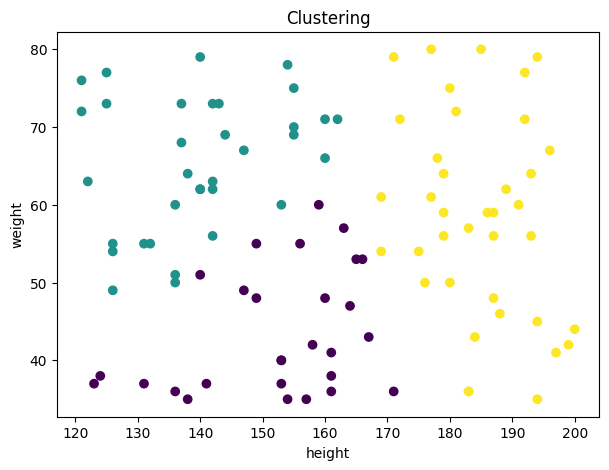

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(x_data.iloc[:,0], x_data.iloc[:,1], c=y_pred)
plt.title('Clustering')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()